# 시계열 데이터 다루기 기초 숙제
- 제공된 apartment.csv 데이터를 이용하여 코드를 완성해주세요
    - 제공된 데이터는 DACON의 '아파트 실거래가 예측 대회'에서 제공된 데이터에서 
    - 하계동에 위치한 현대아파트의 거래연월별 평균 실거래가를 가공한 데이터입니다.
    - https://dacon.io/competitions/official/21265/data

## 데이터를 불러오고 데이터의 정보를 확인해주세요.

In [17]:
import pandas as pd
df = pd.read_csv('apartment.csv')
df.head()

,거래연월,평균실거래가
0,200801,40500.000000
1,200802,42080.000000
2,200803,44783.333333
3,200804,49000.000000
4,200805,44000.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   거래연월    94 non-null     int64  
 1   평균실거래가  94 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.6 KB


## 거래연월 열을 시계열 자료형으로 변환해주세요.
- HINT: 교안대로 하면 이상하게 바뀔겁니다. format 키워드를 활용해주세요.

In [19]:
df['거래연월'] = pd.to_datetime(df['거래연월'], format='%Y%m')

## 거래연월에서 연과 열을 분리해 새로운 열을 만들어주세요.

In [20]:
df['연'] = df['거래연월'].dt.year
df['월'] = df['거래연월'].dt.month
df.head()

,거래연월,평균실거래가,연,월
0,2008-01-01,40500.000000,2008,1
1,2008-02-01,42080.000000,2008,2
2,2008-03-01,44783.333333,2008,3
3,2008-04-01,49000.000000,2008,4
4,2008-05-01,44000.000000,2008,5


## 월별 실거래가 차이를 계산한 `실거래가차이` 열을 만들어주세요.
- 빠진 월은 고려하지 않겠습니다.

In [21]:
df['실거래가차이'] = df['평균실거래가'] - df['평균실거래가'].shift(1)
df.head()

,거래연월,평균실거래가,연,월,실거래가차이
0,2008-01-01,40500.000000,2008,1,NaN
1,2008-02-01,42080.000000,2008,2,1580.000000
2,2008-03-01,44783.333333,2008,3,2703.333333
3,2008-04-01,49000.000000,2008,4,4216.666667
4,2008-05-01,44000.000000,2008,5,-5000.000000


## 거래연월을 순서형 변수로 바꾼 `label_encoded` 열을 만들어주세요.

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['거래연월'])
df

,거래연월,평균실거래가,연,월,실거래가차이,label_encoded
0,2008-01-01,40500.000000,2008,1,NaN,0
1,2008-02-01,42080.000000,2008,2,1580.000000,1
2,2008-03-01,44783.333333,2008,3,2703.333333,2
3,2008-04-01,49000.000000,2008,4,4216.666667,3
4,2008-05-01,44000.000000,2008,5,-5000.000000,4
...,...,...,...,...,...,...
89,2017-05-01,47085.714286,2017,5,-14.285714,89
90,2017-06-01,48258.333333,2017,6,1172.619048,90
91,2017-07-01,49200.000000,2017,7,941.666667,91
92,2017-10-01,51950.000000,2017,10,2750.000000,92


## Challenge 👍
- 거래연월별 평균실거래가를 담은 그래프를 그려주세요
- 정보를 가장 잘 표현하면서 본인이 할 수 있는 가장 예쁜 그래프를 만들어주세요:)

In [30]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['axes.unicode_minus'] = False
import seaborn as sns
sns.set_theme()

In [24]:
df['거래연월'] = df['거래연월'].dt.strftime('%Y-%m')

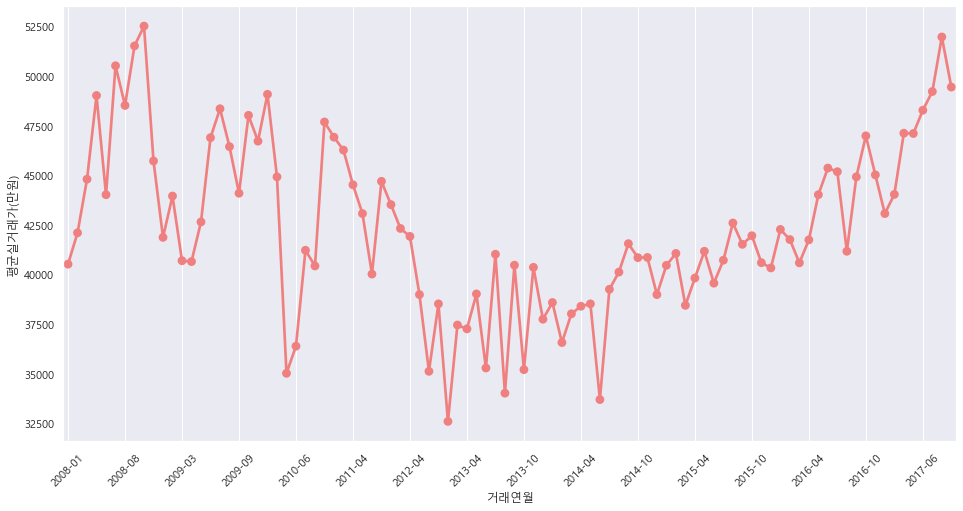

In [38]:
plt.figure(figsize=(16, 8))
plt.rc('font', family='Malgun Gothic')
sns.pointplot(x='거래연월', y='평균실거래가', data=df, color='lightcoral')
plt.ylabel('평균실거래가(만원)')
plt.xlabel('거래연월')
plt.grid()
plt.xticks(np.arange(0, 94, step=6), rotation=45,) # 가로축 표시 90도 회전, 일정 간격 표시
plt.show()